In [1]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# -------------------------------
# 1. Load a Dataset Using NumPy
# -------------------------------
# Provide the correct path to the CSV file in Google Drive
file_path = '/content/drive/My Drive/Telecom_customer churn.csv'

# Load a CSV file. Adjust the path as needed.
data =pd.read_csv(file_path)


# Checking for missing values before filling
missing_values_before = data.isnull().sum()
print("Missing values before filling:\n", missing_values_before)

# Fill missing values with mean for numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Checking for missing values after filling
missing_values_after = data.isnull().sum()
print("\nMissing values after filling:\n", missing_values_after)

Mounted at /content/drive
Missing values before filling:
 rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

Missing values after filling:
 rev_Mean          0
mou_Mean          0
totmrc_Mean       0
da_Mean           0
ovrmou_Mean       0
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           0
Customer_ID       0
Length: 100, dtype: int64


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check column names
print(data.columns)

# Assuming column names are correct after verification
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Replace with correct column names

# Visualizing outliers using boxplots
for column in numeric_columns:
    if column in data.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot for {column}')
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

# Removing or capping outliers
for column in numeric_columns:
    if column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])

# Checking the updated boxplots after outlier removal
for column in numeric_columns:
    if column in data.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot for {column} after outlier handling')
        plt.show()

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# -------------------------------
# 1. Load a Dataset Using NumPy
# -------------------------------
# Provide the correct path to the CSV file in Google Drive
file_path = '/content/drive/My Drive/Telecom_customer churn.csv'

# Load a CSV file. Adjust the path as needed.
data =pd.read_csv(file_path)


# Print column names to verify them
print(data.columns)

# Replace with the correct column names after checking
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Replace with actual column names

# Check if these columns exist in the dataset
for column in numeric_columns:
    if column not in data.columns:
        print(f"Column '{column}' not found in the dataset.")
    else:
        print(f"Column '{column}' exists.")

# Applying feature scaling to numeric columns (if they exist)
scaler = StandardScaler()

# Verify if numeric_columns exist and apply the scaler only to existing columns
if all(col in data.columns for col in numeric_columns):
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
    print(f"Scaling applied to: {numeric_columns}")
else:
    print("One or more columns from numeric_columns not found. Scaling was not applied.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'chu

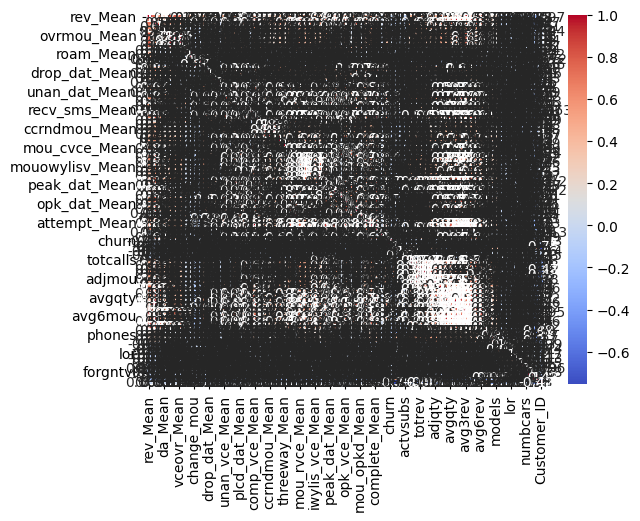

'Churn' column not found.


In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Checking the correlation matrix
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix using heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Visualizing relationships (excluding non-numeric columns)
# Ensure 'Churn' is numeric for the pairplot
if 'Churn' in data.columns:
    # Check if 'Churn' is numeric
    if not np.issubdtype(data['Churn'].dtype, np.number):
        print("'Churn' column is not numeric.")
    else:
        sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
        plt.show()
else:
    print("'Churn' column not found.")

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Print the columns to debug
print("Columns in the DataFrame:", data.columns)

# Check if the required columns exist
required_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Splitting the data into features (X) and target (y)
    X = data[required_columns]  # Independent variables
    y = data['Churn']  # Dependent variable

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the regression model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = regressor.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

Columns in the DataFrame: Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       't

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (mean_squared_error, r2_score, accuracy_score,
                             precision_score, recall_score, f1_score, confusion_matrix)

# Sample DataFrame creation (Replace this with your actual data)
data = pd.DataFrame({
    'tenure': [1, 2, 3, 4, 5],
    'MonthlyCharges': [20.0, 25.0, 30.0, 35.0, 40.0],
    'TotalCharges': [20.0, 45.0, 75.0, 110.0, 150.0],
    'Churn': [0, 1, 0, 1, 0]  # Example target variable
})

# Check the DataFrame structure
print("DataFrame columns:", data.columns)

# Check if the required columns exist
required_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Splitting the data into features (X) and target (y)
    X = data[required_columns]  # Independent variables
    y = data['Churn']  # Dependent variable

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the classification model
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")

DataFrame columns: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[0 1]
 [1 0]]
